In [1]:
from tqdm import tqdm
import numpy as np
from sklearn.datasets import load_iris

from seaborn import despine
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

# loading the iris dataset

In [2]:
data = load_iris(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
data['data'].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


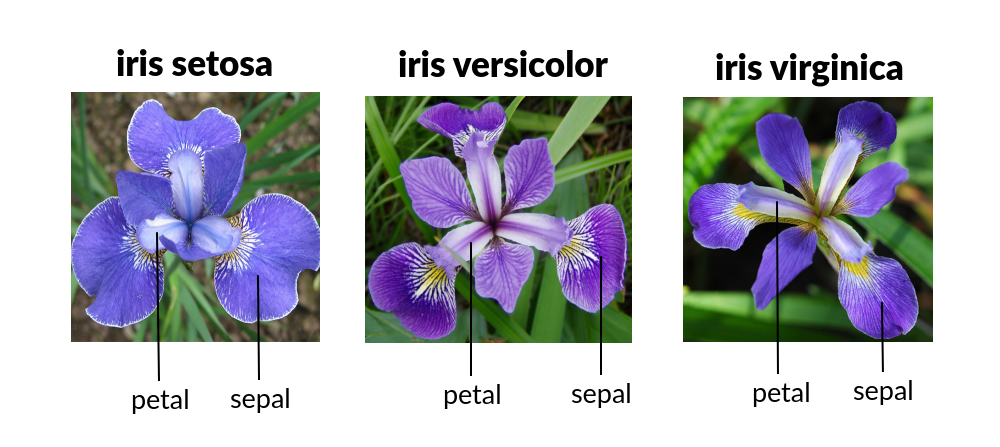

In [5]:
Image(filename='materials/images/iris-data_petal-sepal.png')
# source: https://morioh.com/p/eafb28ccf4e3 (11/24/2020)

# petal width and petal length for iris setosa (class 0) and iris versicolor (class 1)

The task is to predict to which of two possible categories a certain data point belongs based on a set of input variables.

In [6]:
data['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
idx = data['target'].isin((0, 1))
X = data['data'][['petal length (cm)', 'petal width (cm)']].values[idx]
y = data['target'].values[idx]
feature_names = data['feature_names'][2:4]

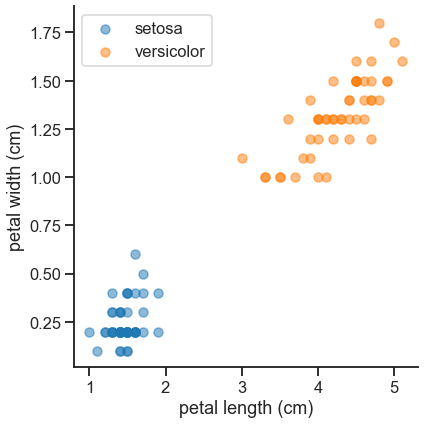

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
for cl in np.unique(y):
    ax.scatter(x=X[y==cl,0],
               y=X[y==cl,1],
               color='C{}'.format(cl),
               label=data['target_names'][cl],
               alpha=0.5)
# add labels
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.legend()
despine(ax=ax)
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-1_Iris-Data-2-Class.png', dpi=600)

## biological inspiration:

Neurons as the subunits of a neural network in a biological brain. 

The signals of variable magnitudes arrive at the dendrites. Those input signals are then accumulated in the cell body of the neuron, and if the accumulated signal exceeds a certain threshold, a output signal is generated that which will be passed on by the axon.

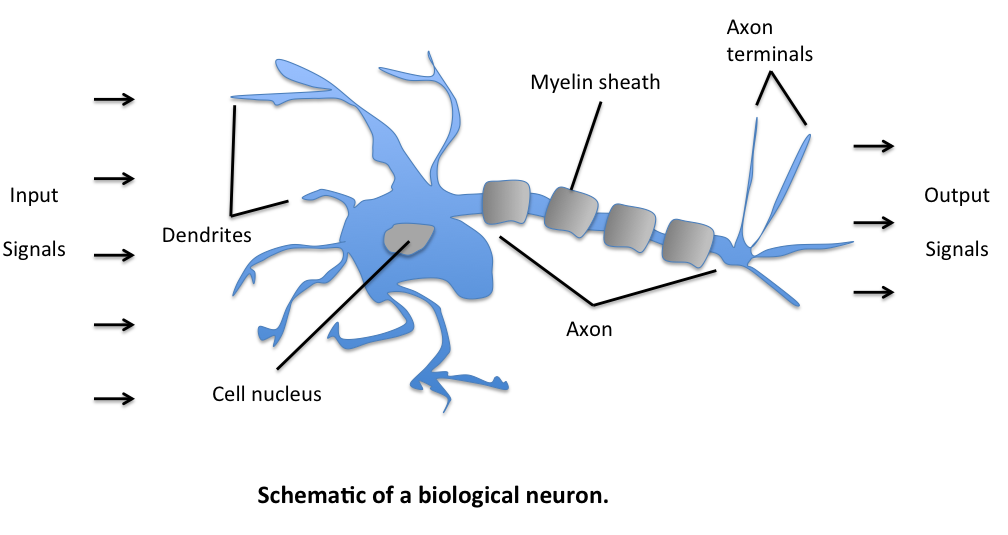

In [9]:
Image(filename='materials/images/perceptron_neuron.png')
# source: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html (11/24/2020)

# perceptron

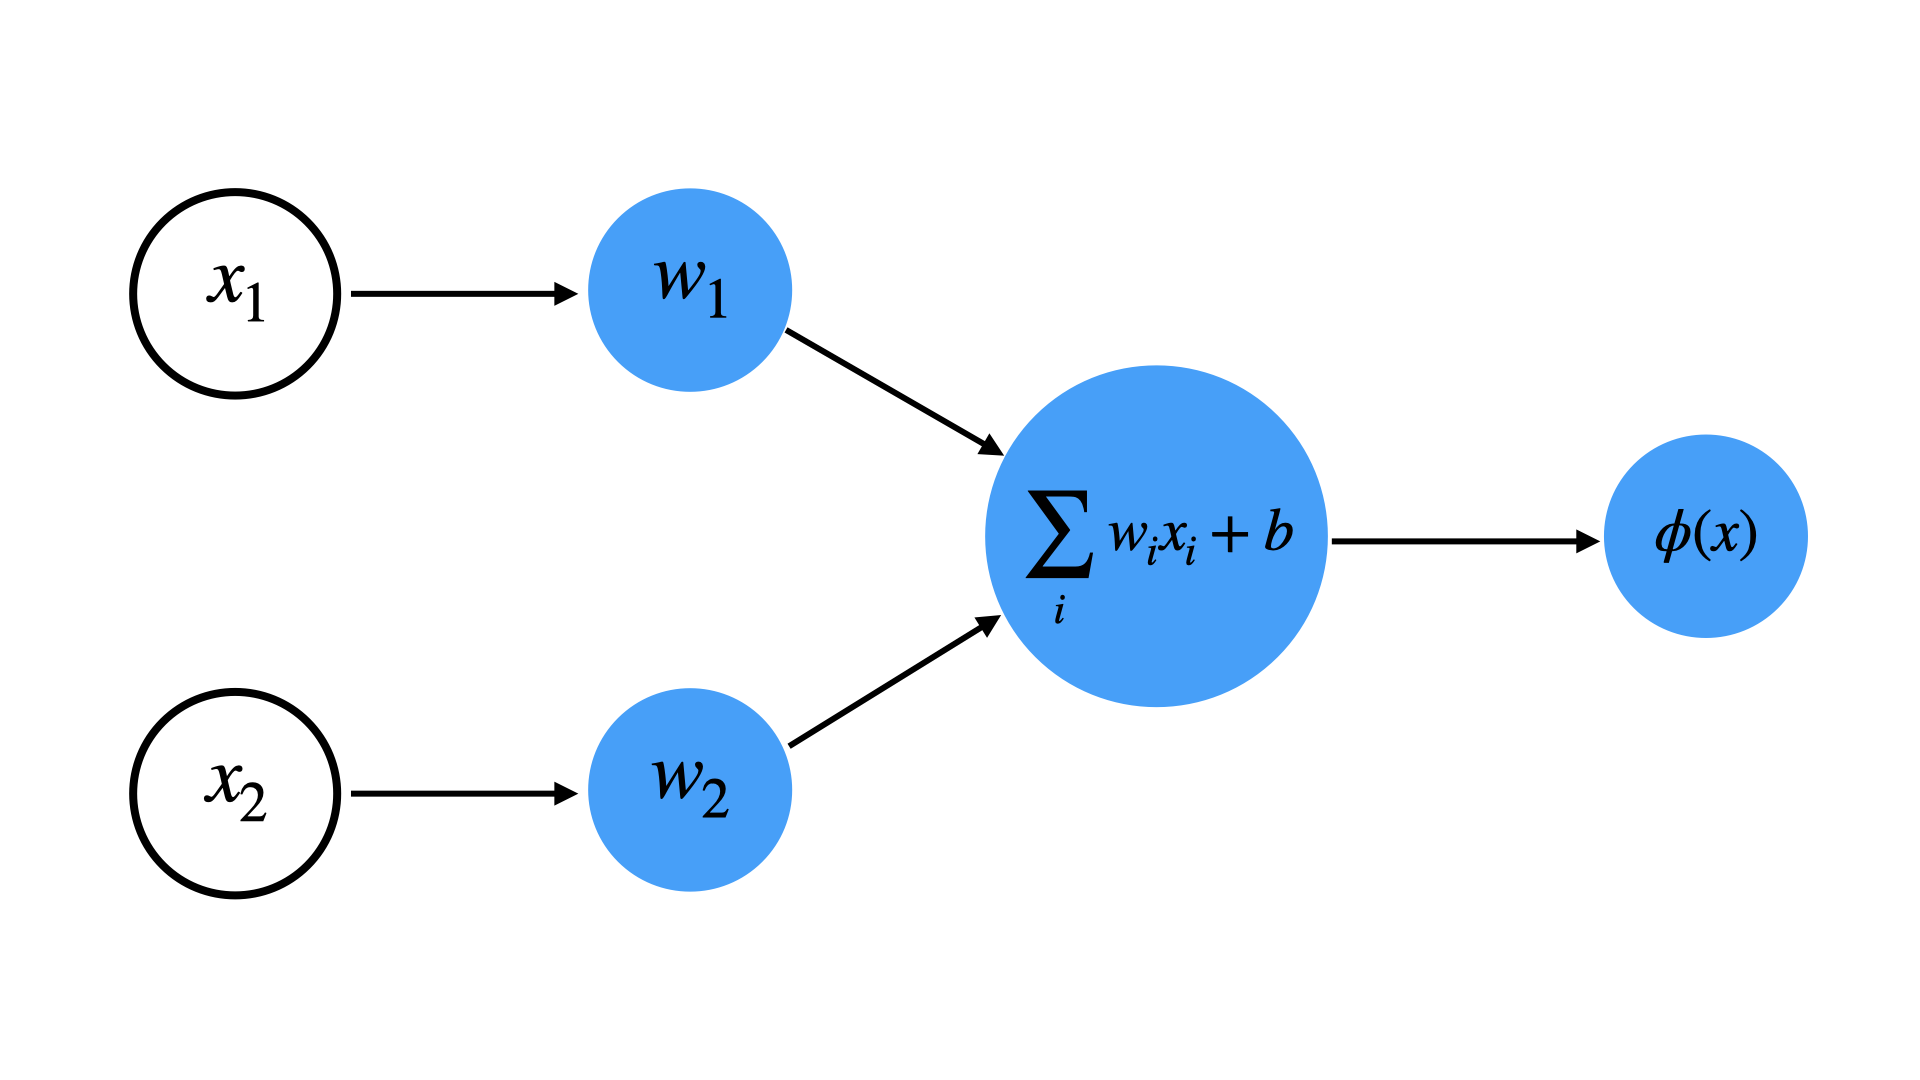

In [10]:
Image(filename='materials/images/perceptron.png')

In [11]:
class Perceptron:
    
    def __init__(self, n_in, b=None):
        self.w = np.random.uniform(-1,1,n_in)
        if b is None:
            self.b = np.random.uniform(-1,1,1)
            self.fit_b = True
        else:
            self.b = b
            self.fit_b = False
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
        
    def predict(self, x):
        self.Z = np.dot(x, self.w) + self.b
        self.A = self.sigmoid(self.Z)
        return self.A
    
    def loss(self, x, y, zerotol=1e-10):
        # cross entropy loss:
        loss = -y * np.log(self.predict(x) + zerotol) - (1 - y) * np.log(1 - self.predict(x) + zerotol)
        return loss
    
    def derivative_Loss(self, x, y):
        # derivative of our cross entropy loss wrt Z
        return self.predict(x) - y
    
    def update_weights(self, x, y, learning_rate):
        # compute derivative of loss wrt Z
        dZ = self.derivative_Loss(x, y)
        # Subtract average derivative from weights
        self.w -= learning_rate * (1.0/x.shape[0] * np.dot(dZ, x))
        if self.fit_b:
            self.b -= learning_rate * (1.0/x.shape[0] * np.sum(dZ))

# loss function

In [12]:
np.random.seed(4321)
perceptron = Perceptron(n_in=2, b=-15)
w_start = np.array(perceptron.w)

In [13]:
w1_vals = np.linspace(-10, 30, 100)
w2_vals = np.linspace(-10, 30, 100)

In [15]:
W1, W2 = np.meshgrid(w1_vals, w2_vals)
grid_r, grid_c = W1.shape
ZZ = np.zeros((grid_r, grid_c))
for i in range(grid_r):
    for j in range(grid_c):
        perceptron.w = np.array([W1[i,j], W2[i,j]])
        ZZ[i, j] += np.mean(perceptron.loss(X, y))

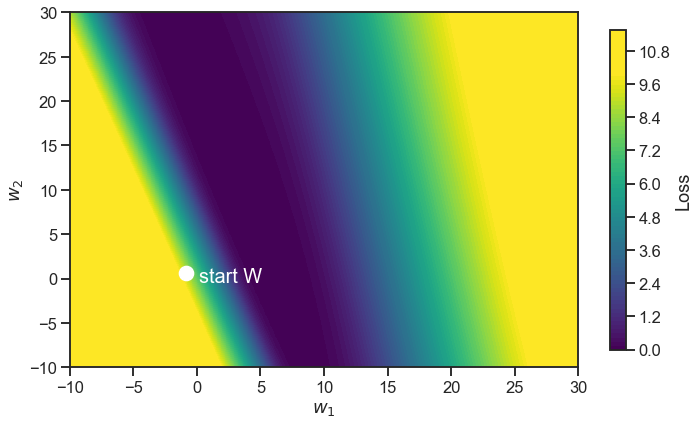

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
# plot contour
cs = ax.contourf(W1, W2, ZZ, 100, vmax=10, cmap=plt.get_cmap('viridis'))
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
# mark start point
ax.scatter(w_start[0], w_start[1], color='white', s=200)
ax.text(w_start[0]+1, w_start[1]-1, 'start W', color='white', fontsize=20)
# label axes
cbar.set_label('Loss')
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-2_Perceptron-Loss.png', dpi=600)

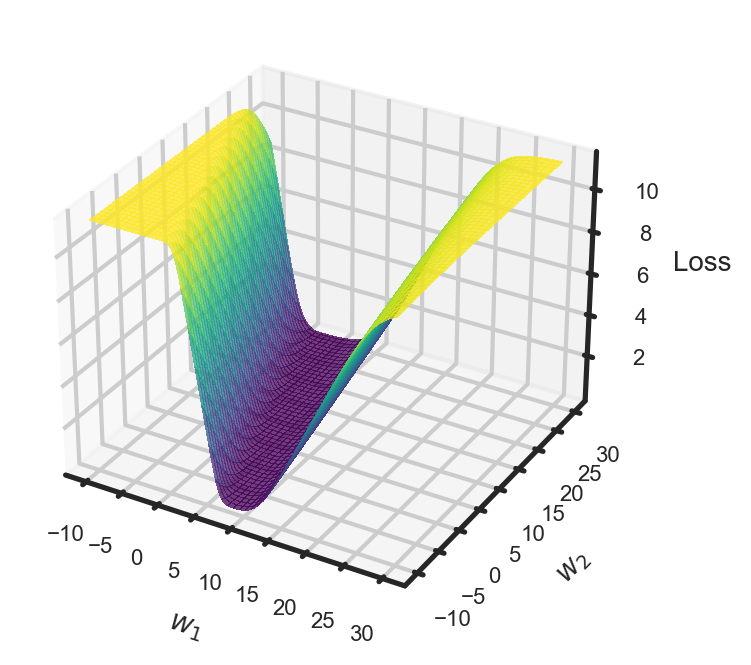

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, ZZ, cmap=cm.viridis, alpha=0.75, 
                linewidth=0, antialiased=False, zorder=-99)
ax.set_xlabel(r"$w_1$", fontsize=10)
ax.set_ylabel(r"$w_2$", fontsize=10)
ax.set_zlabel('Loss', fontsize=10)
ax.tick_params(labelsize=8)
fig.savefig('figures/Figure-0-3_Perceptron-Loss-3D.png', dpi=600)

# gradinet descent

[insert figure]

In [18]:
np.random.seed(4321)
perceptron = Perceptron(n_in=2, b=-15)

In [20]:
n_steps = 40000
batch_size = 32

training_loss = np.zeros(n_steps)
training_w = np.zeros((n_steps,2))
for step in tqdm(range(n_steps)):
    batch_idx = np.random.choice(X.shape[0], batch_size, replace=False)
    training_loss[step] = np.mean(perceptron.loss(X[batch_idx], y[batch_idx]))
    training_w[step] = perceptron.w
    perceptron.update_weights(X[batch_idx], y[batch_idx], 1)

100%|██████████| 40000/40000 [00:02<00:00, 16121.05it/s]


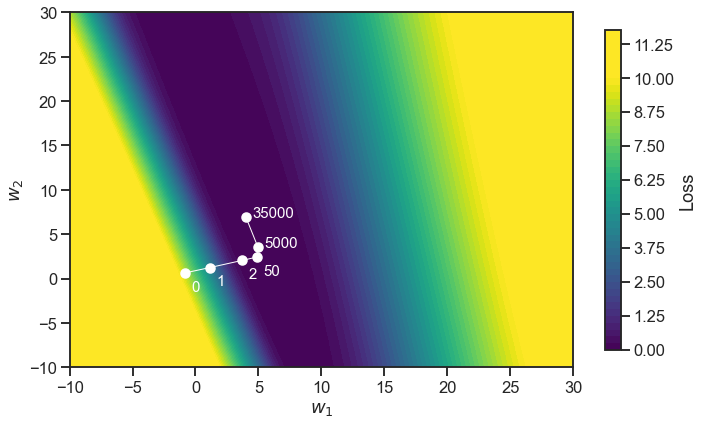

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
# plot contour
cs = ax.contourf(W1, W2, ZZ, 50, vmax=10, cmap=plt.get_cmap('viridis'))
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
# plot trajectory
steps = np.array([0,1,2,50,5000,35000])
ax.scatter(training_w[steps,0], training_w[steps,1], color='white')
ax.plot(training_w[steps,0], training_w[steps,1], color='white', lw=1)
for step in steps:
    if step < 100:
        ax.text(training_w[step,0]+0.5, training_w[step,1]-2, step, color='white', fontsize=15)
    else:
        ax.text(training_w[step,0]+0.5, training_w[step,1], step, color='white', fontsize=15)
# mark start point
# label axes
cbar.set_label('Loss')
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
#ax.set_xlim(-5,20)
#ax.set_ylim(-5,20)
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-4_Perceptron-Loss-Gradinet-Descent-Path.png', dpi=600)

# decision function

In [24]:
# define the x and y scale
x1grid = np.linspace(0, 6, 50)
x2grid = np.linspace(0, 2, 50)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

In [25]:
zz = perceptron.predict(grid).reshape(xx.shape)

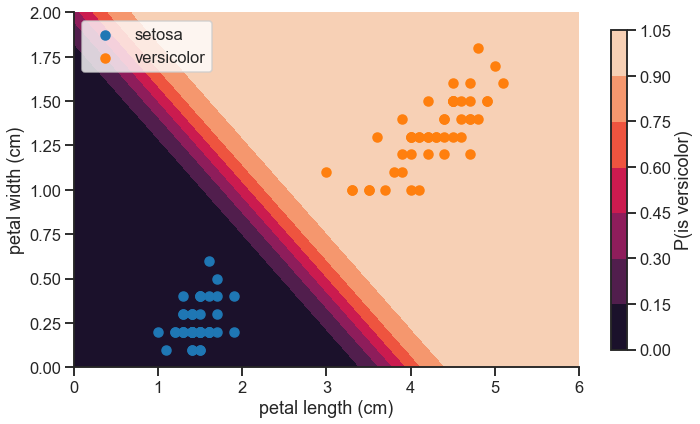

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
cs = ax.contourf(xx,yy,zz)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
cbar.set_label('P(is {})'.format(data['target_names'][1]))
for cl in np.unique(y):
    idx = y==cl
    ax.scatter(x=X[idx,0],
               y=X[idx,1],
               color='C{}'.format(cl),
               label=data['target_names'][cl],
               alpha=1)
# add labels
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.legend()
despine(ax=ax)
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-5_Perceptron-Decision-Function.png', dpi=600)